In [1]:
import pandas as pd
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

from  utils import load_credit_card_data, load_hotel_booking_data, learning_Curve, plot_learning_curve, plot_learning_curve_time, compare_fit_time, compare_pred_time, compare_learn_time

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])

In [72]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


In [2]:
# load hotel booking data
X_hotel, y_hotel = load_hotel_booking_data("./hotel_bookings.csv", sample_rate=0.2)
X_hotel_train, X_hotel_test, y_hotel_train, y_hotel_test = train_test_split(X_hotel, y_hotel, test_size=0.3, random_state=0)


In [9]:
y_hotel['is_canceled'].value_counts()

0    14934
1     8944
Name: is_canceled, dtype: int64

In [34]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 2000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, pop_size=200, mutation_prob=0.1)

nn_model1.fit(X_hotel_train[:5000], y_hotel_train[:5000])

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              learning_rate=0.001, max_iters=2000)

In [35]:
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_hotel_train)

y_train_accuracy = accuracy_score(y_hotel_train, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_hotel_test)

y_test_accuracy = accuracy_score(y_hotel_test, y_test_pred)

print(y_test_accuracy)


0.6413186550197439
0.640284757118928


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


In [36]:
print(classification_report(y_hotel_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76     10465
           1       0.57      0.16      0.26      6249

    accuracy                           0.64     16714
   macro avg       0.61      0.55      0.51     16714
weighted avg       0.62      0.64      0.57     16714



In [37]:
print(classification_report(y_hotel_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76      4469
           1       0.57      0.17      0.27      2695

    accuracy                           0.64      7164
   macro avg       0.61      0.55      0.51      7164
weighted avg       0.62      0.64      0.58      7164



In [54]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing', max_iters = 2000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model2.fit(X_hotel_train, y_hotel_train)

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.001, max_iters=2000)

In [55]:
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_hotel_train)

y_train_accuracy = accuracy_score(y_hotel_train, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_hotel_test)

y_test_accuracy = accuracy_score(y_hotel_test, y_test_pred)

print(y_test_accuracy)

0.5990187866459256
0.5949190396426577


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


In [56]:
print(classification_report(y_hotel_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75     10465
           1       0.20      0.02      0.04      6249

    accuracy                           0.60     16714
   macro avg       0.41      0.48      0.40     16714
weighted avg       0.46      0.60      0.48     16714



In [57]:
print(classification_report(y_hotel_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74      4469
           1       0.18      0.02      0.04      2695

    accuracy                           0.59      7164
   macro avg       0.40      0.48      0.39      7164
weighted avg       0.45      0.59      0.48      7164



In [64]:
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'sigmoid', \
                                 algorithm = 'random_hill_climb', max_iters = 2000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3)

nn_model3.fit(X_hotel_train[:5000], y_hotel_train[:5000])

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.001, max_iters=2000)

In [65]:
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model3.predict(X_hotel_train)

y_train_accuracy = accuracy_score(y_hotel_train, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_hotel_test)

y_test_accuracy = accuracy_score(y_hotel_test, y_test_pred)

print(y_test_accuracy)

0.6045829843245184
0.5993858179787828


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


In [66]:
print(classification_report(y_hotel_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75     10465
           1       0.19      0.02      0.03      6249

    accuracy                           0.60     16714
   macro avg       0.41      0.49      0.39     16714
weighted avg       0.46      0.60      0.48     16714



In [67]:
print(classification_report(y_hotel_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75      4469
           1       0.14      0.01      0.02      2695

    accuracy                           0.60      7164
   macro avg       0.38      0.48      0.39      7164
weighted avg       0.44      0.60      0.48      7164



In [69]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 2000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, pop_size=200, mutation_prob=0.1)

nn_model1.fit(X_hotel_train[:2000], y_hotel_train[:2000])
train_y_pred = nn_model1.predict(X_hotel_train)
test_y_pred = nn_model1.predict(X_hotel_test)
print(classification_report(y_hotel_test, test_y_pred))
print(classification_report(y_hotel_train, train_y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77      4469
           1       0.62      0.13      0.21      2695

    accuracy                           0.64      7164
   macro avg       0.63      0.54      0.49      7164
weighted avg       0.63      0.64      0.56      7164

              precision    recall  f1-score   support

           0       0.65      0.96      0.77     10465
           1       0.65      0.13      0.22      6249

    accuracy                           0.65     16714
   macro avg       0.65      0.54      0.50     16714
weighted avg       0.65      0.65      0.57     16714



In [77]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 2000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, pop_size=200, mutation_prob=0.1)

nn_model1.fit(X_hotel_train[:200], y_hotel_train[:200])
train_y_pred = nn_model1.predict(X_hotel_train)
test_y_pred = nn_model1.predict(X_hotel_test)
print(classification_report(y_hotel_test, test_y_pred))
print(classification_report(y_hotel_train, train_y_pred))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      4469
           1       0.58      0.17      0.26      2695

    accuracy                           0.64      7164
   macro avg       0.62      0.55      0.51      7164
weighted avg       0.62      0.64      0.57      7164

              precision    recall  f1-score   support

           0       0.65      0.93      0.77     10465
           1       0.58      0.16      0.25      6249

    accuracy                           0.64     16714
   macro avg       0.62      0.55      0.51     16714
weighted avg       0.63      0.64      0.57     16714



In [104]:
import time

def learning_Curve(train_X_all, train_y_all, test_x_all, test_y_all, classifier, metric, step=20000, method='genetic_alg'):

    train_metric, val_metric, indices, training_time, testing_time = [], [], [], [], []
    
    for m in range(step, len(train_X_all), step):
        if method == 'genetic_alg':
            print(method)
            classifier = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 4000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 3, pop_size=200, mutation_prob=0.1)
        elif method == 'simulated_annealing':
            print(method)
            classifier = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 4000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = None, restarts=10)
        elif method == 'random_hill_climb':
            print(method)
            classifier = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 4000, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = None, restarts=10)
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        start_training = time.time()
        classifier.fit(train_X, train_y)
        training_time.append(time.time() -  start_training)
        # print("training {} samples took {}".format(m, time.time() -  start_training))

        train_y_pred = classifier.predict(train_X)
        start_testing  = time.time()
        test_y_all_pred = classifier.predict(test_x_all)
        testing_time.append(time.time() - start_testing)

        print(m)
        # print(test_y_all, test_y_all_pred)
        print(classification_report(test_y_all, test_y_all_pred))

        test_avg = metric(test_y_all, test_y_all_pred)
        train_avg = metric(train_y, train_y_pred)

        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices, training_time, testing_time

In [87]:
train_metric_ga, val_metric_ga, indices_ga, training_time_ga, testing_time_ga = learning_Curve(X_hotel_train, y_hotel_train, X_hotel_test, y_hotel_test, nn_model1, f1_score, step=1000)

1000
              precision    recall  f1-score   support

           0       0.63      0.96      0.76      4469
           1       0.55      0.08      0.13      2695

    accuracy                           0.63      7164
   macro avg       0.59      0.52      0.45      7164
weighted avg       0.60      0.63      0.53      7164

2000
              precision    recall  f1-score   support

           0       0.63      0.96      0.76      4469
           1       0.54      0.08      0.13      2695

    accuracy                           0.63      7164
   macro avg       0.59      0.52      0.45      7164
weighted avg       0.60      0.63      0.53      7164

3000
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      4469
           1       0.54      0.18      0.27      2695

    accuracy                           0.63      7164
   macro avg       0.59      0.54      0.51      7164
weighted avg       0.61      0.63      0.57      7164

4000

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9000
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      4469
           1       0.57      0.17      0.27      2695

    accuracy                           0.64      7164
   macro avg       0.61      0.55      0.51      7164
weighted avg       0.62      0.64      0.58      7164

10000
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      4469
           1       0.44      0.24      0.31      2695

    accuracy                           0.60      7164
   macro avg       0.54      0.53      0.51      7164
weighted avg       0.57      0.60      0.57      7164

11000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.35      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.49      0.50      0.39      7164
weighted avg       0.52      0.62      0.48      7164

12

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
train_metric_sa, val_metric_sa, indices_sa, training_time_sa, testing_time_sa = learning_Curve(X_hotel_train, y_hotel_train, X_hotel_test, y_hotel_test, nn_model1, f1_score, step=1000, method='simulated_annealing')

simulated_annealing
1000
              precision    recall  f1-score   support

           0       0.45      0.00      0.01      4469
           1       0.38      0.99      0.54      2695

    accuracy                           0.38      7164
   macro avg       0.41      0.50      0.28      7164
weighted avg       0.42      0.38      0.21      7164

simulated_annealing
2000
              precision    recall  f1-score   support

           0       0.60      0.25      0.35      4469
           1       0.37      0.73      0.49      2695

    accuracy                           0.43      7164
   macro avg       0.49      0.49      0.42      7164
weighted avg       0.52      0.43      0.40      7164

simulated_annealing
3000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.37      0.00      0.01      2695

    accuracy                           0.62      7164
   macro avg       0.50      0.50      0.39      7164

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10000
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      4469
           1       0.62      0.14      0.22      2695

    accuracy                           0.64      7164
   macro avg       0.63      0.54      0.50      7164
weighted avg       0.64      0.64      0.56      7164

simulated_annealing
11000
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      4469
           1       0.46      0.44      0.45      2695

    accuracy                           0.59      7164
   macro avg       0.56      0.56      0.56      7164
weighted avg       0.59      0.59      0.59      7164

simulated_annealing
12000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4469
           1       0.38      1.00      0.55      2695

    accuracy                           0.38      7164
   macro avg       0.19      0.50      0.27      7164
weighted avg    

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4469
           1       0.38      1.00      0.55      2695

    accuracy                           0.38      7164
   macro avg       0.19      0.50      0.27      7164
weighted avg       0.14      0.38      0.21      7164

simulated_annealing


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14000
              precision    recall  f1-score   support

           0       0.64      0.95      0.77      4469
           1       0.62      0.13      0.21      2695

    accuracy                           0.64      7164
   macro avg       0.63      0.54      0.49      7164
weighted avg       0.64      0.64      0.56      7164

simulated_annealing
15000
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      4469
           1       0.70      0.11      0.19      2695

    accuracy                           0.65      7164
   macro avg       0.67      0.54      0.48      7164
weighted avg       0.67      0.65      0.56      7164

simulated_annealing
16000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg    

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
train_metric_rhc, val_metric_rhc, indices_rhc, training_time_rhc, testing_time_rhc = learning_Curve(X_hotel_train, y_hotel_train, X_hotel_test, y_hotel_test, nn_model1, f1_score, step=1000, method='random_hill_climb')

random_hill_climb
1000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4469
           1       0.38      1.00      0.55      2695

    accuracy                           0.38      7164
   macro avg       0.19      0.50      0.27      7164
weighted avg       0.14      0.38      0.21      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2000
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      4469
           1       0.62      0.14      0.22      2695

    accuracy                           0.64      7164
   macro avg       0.63      0.54      0.50      7164
weighted avg       0.64      0.64      0.56      7164

random_hill_climb
3000
              precision    recall  f1-score   support

           0       0.57      0.02      0.04      4469
           1       0.38      0.98      0.54      2695

    accuracy                           0.38      7164
   macro avg       0.47      0.50      0.29      7164
weighted avg       0.50      0.38      0.23      7164

random_hill_climb
4000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg       0.39

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4469
           1       0.38      1.00      0.55      2695

    accuracy                           0.38      7164
   macro avg       0.19      0.50      0.27      7164
weighted avg       0.14      0.38      0.21      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg       0.39      0.62      0.48      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7000
              precision    recall  f1-score   support

           0       0.64      0.98      0.77      4469
           1       0.70      0.09      0.16      2695

    accuracy                           0.64      7164
   macro avg       0.67      0.53      0.47      7164
weighted avg       0.66      0.64      0.54      7164

random_hill_climb
8000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4469
           1       0.38      1.00      0.55      2695

    accuracy                           0.38      7164
   macro avg       0.19      0.50      0.27      7164
weighted avg       0.14      0.38      0.21      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9000
              precision    recall  f1-score   support

           0       0.65      0.94      0.77      4469
           1       0.61      0.14      0.23      2695

    accuracy                           0.64      7164
   macro avg       0.63      0.54      0.50      7164
weighted avg       0.63      0.64      0.57      7164

random_hill_climb
10000
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      4469
           1       0.61      0.14      0.23      2695

    accuracy                           0.64      7164
   macro avg       0.63      0.54      0.50      7164
weighted avg       0.63      0.64      0.57      7164

random_hill_climb
11000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg       0.

/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12000
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      4469
           1       0.46      0.48      0.47      2695

    accuracy                           0.59      7164
   macro avg       0.57      0.57      0.57      7164
weighted avg       0.60      0.59      0.60      7164

random_hill_climb
13000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg       0.39      0.62      0.48      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4469
           1       0.38      1.00      0.55      2695

    accuracy                           0.38      7164
   macro avg       0.19      0.50      0.27      7164
weighted avg       0.14      0.38      0.21      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg       0.39      0.62      0.48      7164

random_hill_climb


/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


16000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4469
           1       0.00      0.00      0.00      2695

    accuracy                           0.62      7164
   macro avg       0.31      0.50      0.38      7164
weighted avg       0.39      0.62      0.48      7164



/Users/annieyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


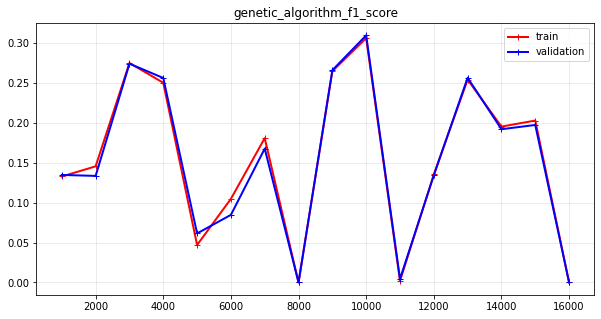

In [110]:
plot_learning_curve(train_metric_ga, val_metric_ga, indices_ga, 'genetic_algorithm_f1_score', inverse_x=False)

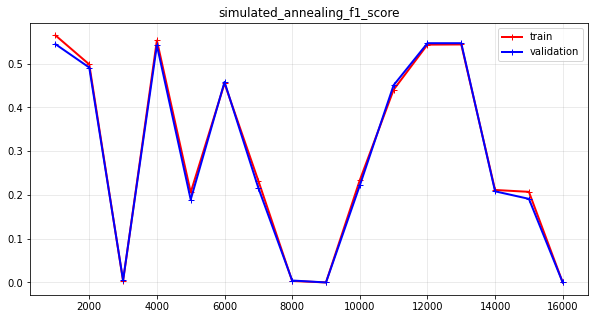

In [111]:
plot_learning_curve(train_metric_sa, val_metric_sa, indices_sa, 'simulated_annealing_f1_score', inverse_x=False)

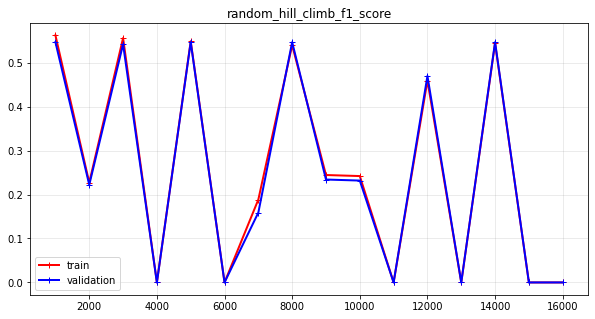

In [112]:
plot_learning_curve(train_metric_rhc, val_metric_rhc, indices_rhc, 'random_hill_climb_f1_score', inverse_x=False)